# Working with Pandas

In [1]:
# Loading library
import pandas as pd
import numpy as np
import seaborn

### Getting information about dataset in seaborn

In [4]:
seaborn.get_dataset_names()

/Users/athulyagk/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/athulyagk/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [5]:
titanic=seaborn.load_dataset('titanic')

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
# subsetting the columns
titanic_new=titanic.loc[:,'survived':'age']

In [18]:
titanic_new.tail()

,survived,pclass,sex,age
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0
890,0,3,male,32.0


In [21]:
# multy index in pandas
titanic_new_index=titanic_new.set_index(['sex','age'])
titanic_new_index.head()

survived  pclass
sex    age                   
male   22.0         0       3
female 38.0         1       1
       26.0         1       3
       35.0         1       1
male   35.0         0       3

In [34]:
titanic_new_index.loc['female',26]


/Users/athulyagk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


survived  pclass
sex    age                   
female 26.0         1       3
       26.0         1       1
       26.0         0       2
       26.0         1       3
       26.0         0       3

In [50]:
titanic_new_index.stack().head()

sex     age           
male    22.0  survived    0
              pclass      3
female  38.0  survived    1
              pclass      1
        26.0  survived    1
dtype: int64

In [49]:
# Sub setting based on age
titanic_new[titanic_new.age>50].head()

,survived,pclass,sex,age
6,0,1,male,54.0
11,1,1,female,58.0
15,1,2,female,55.0
33,0,2,male,66.0
54,0,1,male,65.0


In [47]:
# unstacking the dataframe
titanic_unstack=titanic_new.unstack()
titanic_unstack.head()
# in pandas unstack dataframe cannot converted into stacked one

survived  0    0
          1    1
          2    1
          3    1
          4    0
dtype: object

In [71]:
# survived people in titanic
survived=titanic_new[titanic_new['survived']==1]
survived.head()


,survived,pclass,sex,age
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
8,1,3,female,27.0
9,1,2,female,14.0


In [68]:
# total number of survived people
len(survived)

342

In [74]:
survived_male=survived[survived["sex"]=="male"]
# total number of male survived
len(survived_male)

109

## visualization of dataset

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

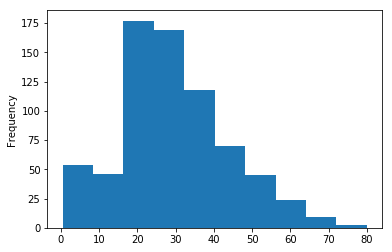

In [76]:
# Histrogram of age
titanic['age'].plot.hist()

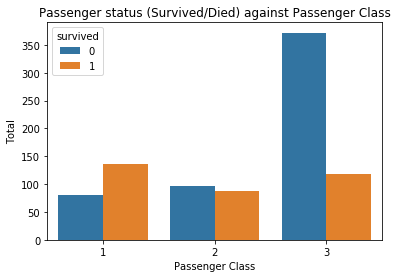

In [87]:
# Box plot of pclass vs survived or not
ax = sns.countplot(x = 'pclass', hue = 'survived',  data = titanic)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class', 
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

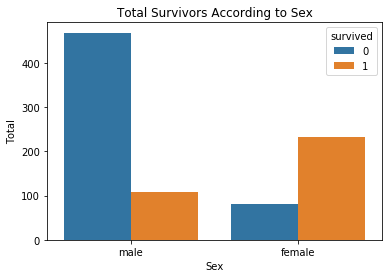

In [88]:
# Box plot of sex and survived or not
ax = sns.countplot(x = 'sex', hue = 'survived', data = titanic)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

/Users/athulyagk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


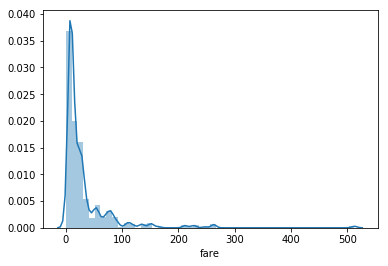

In [91]:
# sns plot of fare
sns.distplot(titanic['fare'], kde=True)

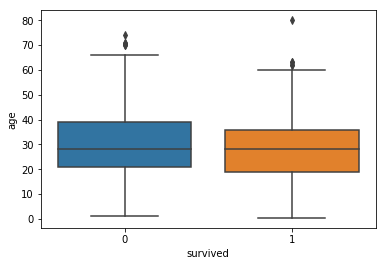

In [97]:
#Box plot of age vs survived
sns.boxplot(x="survived", y="age", data=titanic)

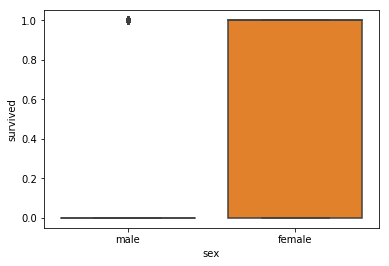

In [98]:
# Box plot of sex vs survived
sns.boxplot(x="sex", y="survived", data=titanic)

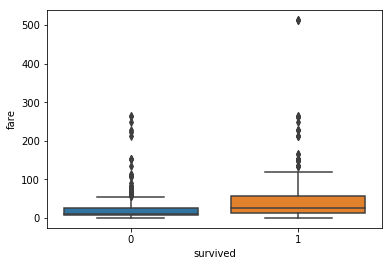

In [99]:
#Box plot of survived vs fare
sns.boxplot(x="survived", y="fare", data=titanic)